Money Can Talk, but where does it LIVE?
====================

![MD](md-multicolor.jpg "Money")

![Mr Krabs](Krab.jpg "Money")


Data Science Tutorial
---------------------


*By Praise Ntali*

Introduction
====================

   In high school I took AP Human Geography. That class focused on the physical and social aspects of geography on a regional scale. There was a mini unit about the counties of Maryland where I learned that Talbot county was the richest county in Maryland as a side remark, but I always thought that title belonged to Montgomery County. Remembering this memory from high school encouraged me to take a closer look at the per capita household income. A quick google search reassured me that Maryland was the top in average per capita household income. However, I am still interested in seeing the relationship between income and some other factor. In this tutorial I will be analyzing the per capita household income county by county for select counties to draw some conclusions about where the more affluent counties are. 

Data Collection
------

    To start, these are the libraries that I used to collect, organize, and perform analytics on the data collected


In [1]:
# These librares and packages will help me properly visualize, analyze, and wrangle the data. 

import pandas as pd
import matplotlib.pyplot as mpl
import numpy as np
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm



Data Collection
===



[open_data]: https://opendata.maryland.gov/

   The state of Maryland hosts its own datasets at this [site][open_data]. This site hosts many different types of datasets that document data on a range of topics. From data about Agriculture to Demographics, this ‘databank’ has anything you need. It also has a lot of ways to view the data from maps, to calendars, to charts. There is something for anyone here. 
   
 
Source
----


[MD_data]: https://opendata.maryland.gov/Demographic/Maryland-Per-Capita-Personal-Income-Current-Dollar/nv7y-8663

The specific dataset I collected was in the demographics section and can be found here

   This [dataset][MD_data] is a table that shows the average per capita personal income in the state of Maryland from the years 2010 to 2018. It also breaks down county averages as well for those years. The organization of this particular dataset will work quite nicely for the county to county analysis I plan to do. 

   The table on this particular dataset holds information on all 24 counties of Maryland. We do not need all of this data, because I plan to sample specific counties from each region. To start, however, I will still read in all of the data as seen by the code below. I store the scraped data into a dataframe for safekeeping. 

In [2]:
# A look at the raw data
Income_df = pd.read_csv('Maryland_per_capita_personal_income_2010-2018.csv')

Income_df


,Date created,Year,MARYLAND,Allegany County,Anne Arundel County,Baltimore City,Baltimore County,Calvert County,Caroline County,Carroll County,...,Kent County,Montgomery County,Prince George's County,Queen Anne's County,Somerset County,St. Mary's County,Talbot County,Washington County,Wicomico County,Worcester County
0,"September 29, 2020",2010,"50,007","32,000","52,982","37,994","49,306","50,169","34,465","48,233",...,"45,452","70,848","40,944","49,616","25,701","46,915","57,109","37,076","34,674","44,454"
1,"September 29, 2020",2011,"52,433","33,258","55,820","40,158","50,567","52,385","36,671","50,609",...,"47,592","75,098","42,526","52,018","26,394","48,964","59,790","38,682","35,458","46,298"
2,"September 29, 2020",2012,"53,547","33,946","57,182","40,744","51,982","53,326","38,773","51,859",...,"48,590","76,901","42,842","53,617","26,830","49,300","60,548","39,822","35,419","48,977"
3,"September 29, 2020",2013,"53,057","34,507","57,299","41,710","51,840","52,880","39,860","52,296",...,"49,576","73,555","42,708","53,925","28,129","49,152","61,683","40,180","36,129","49,553"
4,"September 29, 2020",2014,"54,695","35,806","59,202","44,086","53,832","54,467","40,931","54,479",...,"52,078","74,833","43,642","55,626","29,709","50,543","64,064","41,711","38,105","51,270"
5,"September 29, 2020",2015,"57,150","36,945","61,541","46,192","55,591","56,868","41,864","56,956",...,"54,370","79,913","44,911","57,463","30,042","52,337","67,213","43,247","39,448","55,841"
6,"September 29, 2020",2016,"59,042","38,104","62,866","47,510","57,199","58,312","42,905","58,699",...,"55,909","83,956","46,048","60,105","29,867","53,482","68,648","44,355","39,711","55,989"
7,"September 29, 2020",2017,"60,522","38,754","64,519","48,945","58,638","59,974","44,788","60,423",...,"58,154","85,345","47,348","62,287","31,147","54,446","69,455","45,087","40,839","58,054"
8,"September 29, 2020",2018,"63,426","40,517","67,363","51,357","61,556","62,591","45,906","63,039",...,"61,497","89,690","49,420","64,810","31,562","56,820","73,232","47,092","42,054","60,007"


Data Cleanup
===

The month is May and we must do some spring cleaning on the dataset! The data tidying process is the opportunity for the data scientist to come up with proper procedures to deal with missing data, clean out unwanted columns, and reformat the dataframe to be more conducive to an efficient data science evaluation.

There isn’t any missing data on this particular dataset, but I will be removing unwanted columns to make better conclusions. The state of Maryland is a meandering state with awkward boundaries for set regions, so I will be keeping Montgomery County, Talbot County, Frederick County *(my home county)*, and other counties that are spread across the state to account for that. 

I also removed the “Date Created” column, since it highlights when the data was added to the dataset, which is irrelevant to the topic of the data. I do just that with the code below. My sample of different areas of Maryland led to 9/24 counties being accounted for.  


In [3]:
# Trimming the dataframe down to the desired columns
Income_df = Income_df[['Year','MARYLAND', 'Frederick County', 'Montgomery County', 'Talbot County', 'Garrett County', 
                      'Worcester County', 'Cecil County', 'Baltimore County', 'Calvert County', 'Charles County']]
Income_df

,Year,MARYLAND,Frederick County,Montgomery County,Talbot County,Garrett County,Worcester County,Cecil County,Baltimore County,Calvert County,Charles County
0,2010,"50,007","49,312","70,848","57,109","34,718","44,454","37,906","49,306","50,169","47,795"
1,2011,"52,433","51,085","75,098","59,790","36,321","46,298","39,482","50,567","52,385","49,766"
2,2012,"53,547","52,028","76,901","60,548","36,945","48,977","40,299","51,982","53,326","50,023"
3,2013,"53,057","52,117","73,555","61,683","38,086","49,553","40,804","51,840","52,880","49,676"
4,2014,"54,695","53,601","74,833","64,064","40,302","51,270","42,119","53,832","54,467","50,620"
5,2015,"57,150","55,473","79,913","67,213","41,690","55,841","43,492","55,591","56,868","52,475"
6,2016,"59,042","57,697","83,956","68,648","42,478","55,989","44,440","57,199","58,312","53,773"
7,2017,"60,522","59,455","85,345","69,455","43,328","58,054","45,650","58,638","59,974","54,857"
8,2018,"63,426","61,869","89,690","73,232","45,595","60,007","47,695","61,556","62,591","57,051"


Exploratory Data Analysis
====

Violin Plot
---

To get started, I wanted to look at how the average salaries are distributed so I can eyeball them and get a sense about what to do next. I chose a violin plot, since it would help me see the trend in the average salary and establish if there’s any skew or anything else to look for. I could have also chosen a boxplot to represent the data, since it is similar to violin plots. However, seeing the quartiles, IQR, and range wasn’t part of my analysis so I chose not to display unnecessary information. As it stands, there appears to be a positive correlation between the year and the salary. A large concentration of the data also appears to be below the mean. I will eventually take a closer look to see if I can draw a conclusion on anything regional. Here is the plot below 


/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


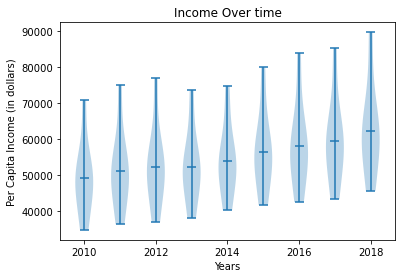

In [4]:
# For the rest of the graph, I decided to turn the string values into integers so I can properly work with the data. I made 
# a violin plot to just examine the distribustion of the salaries per year. There is a visible positive trend. of the mean 
# per capita household income as the years progress. 

for i in range(9):
    for j in range(11):
        s = Income_df.iloc[i,j]
        s = str(s)
        s = s.replace(',', '')
        Income_df.iloc[i,j] = int(s)


# I start the rows at the 2nd entry, because the Maryland Average doesn't need to be on there. This is a violin plot for the
# sampled counties.
inc_exp = [Income_df.iloc[0,2:].values.tolist(),
           Income_df.iloc[1,2:].values.tolist(),
           Income_df.iloc[2,2:].values.tolist(),
           Income_df.iloc[3,2:].values.tolist(),
           Income_df.iloc[4,2:].values.tolist(),
           Income_df.iloc[5,2:].values.tolist(),
           Income_df.iloc[6,2:].values.tolist(),
           Income_df.iloc[7,2:].values.tolist(),
           Income_df.iloc[8,2:].values.tolist()]

inc_years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]



# the maplotlib violin plot
mpl.violinplot(inc_exp,inc_years,widths=0.5,showmeans=True)
mpl.xlabel("Years")
mpl.ylabel("Per Capita Income (in dollars)")
mpl.title("Income Over time")

mpl.show()




Region Mapping
---

Next, from my sample of counties, I want to assign a region to them. Here is the map and the region mapping.

![MDR](MD-Regional.png "Money")


Maryland is a meandering state so I decided to stick with North and South as my regions. If I chose to include East and West or some other combination, it wouldn’t be a fair sample. The western half of Maryland lacks a southern side and is generally lopsided. I could have based my regions off of human geography, like whether it was a rural, suburban, or urban county. These could be potential factors that could determine a relationship. I chose to approach it the way I did, because the dataset lists data purely by county. So to accurately create regions from this criteria, I would need to sample the populations from each county. That is a procedure that would be helpful after the results of this particular investigation.


In [5]:
# For this next leg of the research, I am using this code fragment to create a dataframe of the counties with their assigned
# region
Counties_lst = []
Region_lst = []

Counties_lst = Income_df.columns.values.tolist()

# I delete the first two entries, since they are 'Year' and 'MARYLAND', aka not counties. 
del Counties_lst[0]
del Counties_lst[0]

Region_lst = ['North', 'North', 'South', 'North', 'South', 'North', 'North', 'South', 'South']

### Here is the Table Below

In [6]:
# Now we have a mapping of a specific county to its region. I will use this dataframe to mark each scatter plot. 
c_df = pd.DataFrame(Counties_lst)
c_df.columns = ['Counties']

r_df = pd.DataFrame(Region_lst)
r_df.columns = ['Region']

c_df = c_df.join(r_df)

c_df

,Counties,Region
0,Frederick County,North
1,Montgomery County,North
2,Talbot County,South
3,Garrett County,North
4,Worcester County,South
5,Cecil County,North
6,Baltimore County,North
7,Calvert County,South
8,Charles County,South


Scatter Plots
---

For the last stage of exploration, I want to get a read on the growth of each county per year. I created a scatter plot for each county with a simple regression line and I included the slope of each line. The slope indicates how much money gained per year. 

For one, I saw that there was a relatively strong positive relationship between income and time. This shows me that any investigation I do would have to account for the different income per year. Furthermore, I noticed that in each region I selected, there were counties with high growth and low growth. And I also saw that for each region the amount of money varied. So for my machine learning and testing, I will take note of this and keep testing for that relationship between the two variables. 

The work is below. 


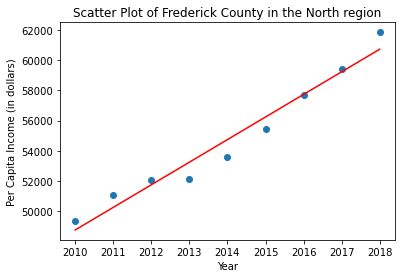

Average increase in dollars per year in Frederick County County 1500.533333333474


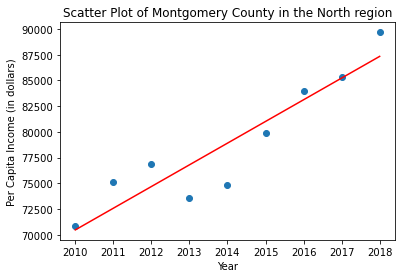

Average increase in dollars per year in Montgomery County County 2109.6166666668487


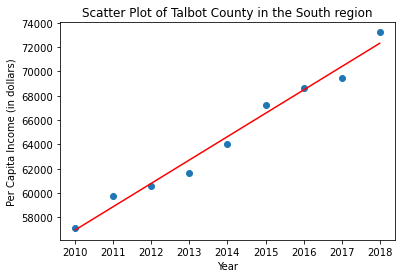

Average increase in dollars per year in Talbot County County 1920.2833333334972


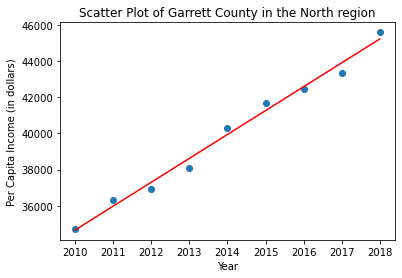

Average increase in dollars per year in Garrett County County 1319.9833333334457


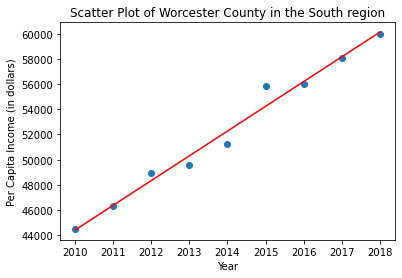

Average increase in dollars per year in Worcester County County 1963.200000000162


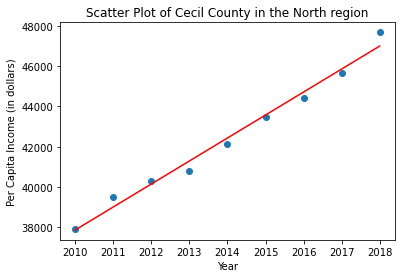

Average increase in dollars per year in Cecil County County 1143.8333333334313


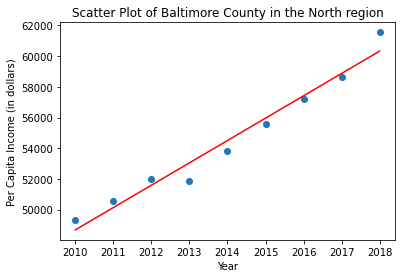

Average increase in dollars per year in Baltimore County County 1456.6333333334696


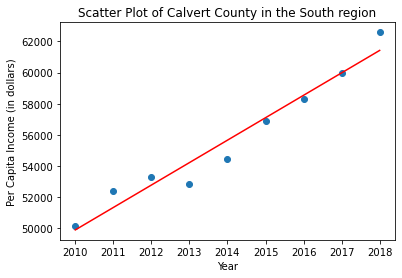

Average increase in dollars per year in Calvert County County 1440.2500000001287


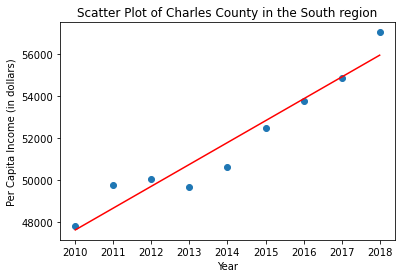

Average increase in dollars per year in Charles County County 1043.2666666667626


In [7]:
# In this loop, I am iterating through the columns of the dataframe to make a scatter plot for each county. 

for i in range(2,11,1):
    
    # I turn these into pandas series to allow me to use polyfit for the regression line
    x = pd.Series(Income_df.iloc[:, 0], dtype='int')
    y = pd.Series(Income_df.iloc[:, i], dtype='int')
    
    m, b = np.polyfit(x, y, 1)
    mpl.plot(x, m*x + b, 'r')
    
    
    # Custom titles with standard labels
    mpl.xlabel('Year')
    mpl.ylabel('Per Capita Income (in dollars)')
    mpl.title('Scatter Plot of ' + c_df.iloc[i-2,0] + ' in the ' + c_df.iloc[i-2,1] + ' region') 
    
    mpl.scatter(x,y)
     
    mpl.show()
    print('Average increase in dollars per year in ' + c_df.iloc[i-2,0] +' County', m)

Hypothesis Testing
====

From the exploratory analysis, I was able to draw the following conclusions. With the violin plot, I saw that the concentration of the data from the sample is below the mean and it appears to be skewed upward. Then with the scatter plots, I saw that they fit their respective regression lines pretty well. The only perplexing thing is that there were varying results based on the region labels I designed. So right now I want to test if there is a relationship between money and region. The null hypothesis being that there is no such relationship.

I will create two models. First I will create confidence intervals to compare the means of both regions. Then I will conduct a t test for the difference of means for each region. I chose to do a confidence interval, since I am interested in seeing the sample mean and where the true mean could possibly live. I chose a t test for the difference of means, since we were given the means for the entire state of Maryland, so testing the relationship between the state mean and a regional mean for a significant difference would show if there is some relationship between region and the per capita income.


Confidence interval
---

For the confidence intervals, I will create some for the north region and for the south region and compare the intervals. The confidence intervals will give a rough estimate of where the true mean is for each region per year. I will be looking for a significant difference between the two. 

Since there are 9 years of data to make confidence intervals for, I will make 3 sets of intervals for the beginning year (2010), the middle year (2014), and the end year (2018). This is because we saw from the exploration that for all counties, there is a steady increase in per capita income. I will test at the 95% level of significance so that the intervals won’t be too large. I will also be doing the t distribution since n < 30.  The model is below.


In [8]:
# In this part of the program, I am looping through the first, middle, and last years in the sample to take confidence
# intervals of the sample means. I am taking two confidence intervals per year to observe a significant difference 
# between them. I am heavily relying on the scipy t interval method. 

#Loops through the first, middle, and last
for i in range(0, 9, 4):
    year_lst = Income_df.iloc[i,2:].values.tolist()
    north_lst = []
    south_lst = []
    
    #I loop through a specific column and put the north with the north and the south with the south
    for j in range(len(year_lst)):
        if(j == 0 or j == 1 or j == 3  or j == 5 or j == 6):
            north_lst.append(year_lst[j])
        else:
            south_lst.append(year_lst[j])

    nor_inv = st.t.interval(alpha=0.95, df=len(north_lst)-1, loc=np.mean(north_lst), scale=st.sem(north_lst)) 
    south_inv = st.t.interval(alpha=0.95, df=len(south_lst)-1, loc=np.mean(south_lst), scale=st.sem(south_lst)) 
    year = 2010 + i
    
    print('Confidence interval of per capita in the North in the year', year, '->', nor_inv )
    print('Sample mean for the north:', np.mean(north_lst))
    print('Confidence interval of per capita in the South in the year', year, '->', south_inv )
    print('Sample mean for the north:', np.mean(south_lst))
    print('\n')

Confidence interval of per capita in the North in the year 2010 -> (30826.587281243603, 66009.4127187564)
Sample mean for the north: 48418.0
Confidence interval of per capita in the South in the year 2010 -> (41355.67151517098, 58407.82848482902)
Sample mean for the north: 49881.75


Confidence interval of per capita in the North in the year 2014 -> (35852.118215207935, 70022.68178479208)
Sample mean for the north: 52937.4
Confidence interval of per capita in the South in the year 2014 -> (45232.26171442418, 64978.23828557582)
Sample mean for the north: 55105.25


Confidence interval of per capita in the North in the year 2018 -> (39435.804976160034, 83126.19502383997)
Sample mean for the north: 61281.0
Confidence interval of per capita in the South in the year 2018 -> (52005.58004332232, 74434.91995667768)
Sample mean for the north: 63220.25





I fit the confidence interval model to the data. Above, I listed the confidence intervals for the beginning, middle, and last years of the dataset. There are some things to note. The confidence intervals are all over the place, but the sample means for the whole north and south regions are somewhere in there. The possible reason for all that variation is the small dataset sizes. The dataset sizes for all 3 years were 5 and 4. But it is important to note that the difference between the sample means for both seem negligible. They are about the same, regardless of region. So this is encouraging me to fit a new model and run a significance test to see if I can make a proper conclusion about the relationship between region and per capita income.


------

T test for difference of means
---

I chose to run a t test for the difference of means, because the dataset also provides a yearly average per capita income for the entire state. That can be my μ2. My μ1 will be the region I choose to compare to the Maryland mean. The null hypothesis states that there is no relationship between income and region. So the difference between the two shouldn’t be statistically significant. To reject this null hypothesis, I will try to test at the 0.1, 0.05, and 0.01 level of significance.

- H0: μ2-μ1 = 0
- H1: μ2-μ1 ≠ 0  

Below I am laying the groundwork to collecting both sets of μ1. The idea of creating dataframes for the regions is to juxtapose it with the mean I am comparing it to. 

In [9]:
# Here I am going to make two new dataframes that will list all the data points from the north region and the south region.
# I created a function that can create such a dataframe for the north and the south.

# These arrays are full of the indices of the northern and southern counties.
north_ind = [2,3,5,7,8]
south_ind = [4,6,9,10]

def create_df(arr):
    year_arr = []
    money_mean_arr = []
    
    # Here I loop through the Income dataframe and append things to a list. 
    for i in range(9):
        year_arr.append(2010 + i)
        money_arr = []
        for j in range(len(arr)):
            money_arr.append(Income_df.iloc[i,arr[j]])
        b = np.mean(money_arr)
        money_mean_arr.append(b)
            
       
    # Here I create the dataframe that I will return. 
    a = pd.DataFrame(year_arr)
    a.columns = ['Year']

    b = pd.DataFrame(money_mean_arr)
    b.columns = ['Mean Per Capita Income']
    
    a = a.join(b)
    
    return a
        

In [10]:
# These create the dataframes needed to conduct the t test for the difference of means

# I utilize my function below. 
north_df = create_df(north_ind)
south_df = create_df(south_ind)

# I create a column to add the Maryland Mean
md = Income_df.iloc[:,1]
md_df = pd.DataFrame(md)
md_df.columns = ['Maryland Mean']

north_df = north_df.join(md_df)
south_df = south_df.join(md_df)

north_df.columns = ['Year', 'Northern Mean Income', 'Maryland Mean']
south_df.columns = ['Year', 'Southern Mean Income', 'Maryland Mean']


In [11]:
# A test of one of the tables. The southern table looks just like this with its own unique values. 

north_df

,Year,Northern Mean Income,Maryland Mean
0,2010,48418.0,50007
1,2011,50510.6,52433
2,2012,51631.0,53547
3,2013,51280.4,53057
4,2014,52937.4,54695
5,2015,55231.8,57150
6,2016,57154.0,59042
7,2017,58483.2,60522
8,2018,61281.0,63426


Above I set up the input to my function that is set up below. That function takes advantage of the scipy.stats library to return the desired stats for my significance test.

In [12]:
# In this custom function, I input a dataframe and run a t test on a select two of the colums. Making a function prevents me
# from needing redundant code for the north and south regions. 

def return_t_test(df, region):
    
 
    
    A = pd.Series(df.iloc[:,2], dtype = 'int') # Regional Mean
    B = pd.Series(df.iloc[:,1], dtype = 'int') # Maryland Mean
   
    t, p = st.ttest_ind(A,B)

    print('t value for ' + region + ' Countes:', t)
    print('p value for ' + region + ' Counties:' , p)
    print('\n')
    

The model shows that the ‘p’ values are *much* higher than the 0.1, 0.05, and the 0.01 significance levels. The p value for the northern region was 0.36 and the p value for the southern region was a whopping 0.96. P values like these make me unable to reject the null hypothesis for any of the two regions.

In [13]:
return_t_test(north_df, 'Northern')
return_t_test(south_df, 'Southern')

t value for Northern Countes: 0.9335831837820903
p value for Northern Counties: 0.3643948936179765


t value for Southern Countes: -0.049303850461301105
p value for Southern Counties: 0.9612873824944865




Conclusion
====

The significance test for difference of means showed that I am unable to reject the null hypothesis that there is no relationship between region and per capita income. When one is unable to reject the null hypothesis, it doesn’t necessarily mean that there is no relationship. It means that further research and insight need to be made to statistically prove that there is a relationship between per capita income and some other variable.

In terms of the question, “Where does the money live?”, we must re-evaluate the meaning of ‘where’. Where refers to a place and it would be interesting and satisfying to see these places and how to categorize them. What we do know is that Maryland and Talbot county are visibly more affluent than any other county in Maryland and this model showed that we are unable to prove anything based on the geographical locations that I provided. We also learned from this model that from the years 2010 to 2018, there appears to be a right skew in the distribution of per capita income. The violins are thinner in the upper ranges.

As Data Scientists, there is no ‘end’ of an investigation. Our investigation and our conclusions will be used as a motivation and warrant for a new investigation. If you are interested in seeing where to look, I will link some sources about the wealth of counties.


[MD_Demo]:https://www.montgomerycountymd.gov/Homelessness/demographics.html#:~:text=Montgomery%20County%2C%20Maryland%20is%20a,counties%20in%20the%20United%20States.

[Tal_Dem]: https://www.myeasternshoremd.com/easton-ranked-6th-richest-small-town/article_83aec5dc-d0c3-5ce5-9571-c35077b38c92.html

[Rich_Dem]: https://www.cnsnews.com/news/article/terence-p-jeffrey/census-bureau-5-richest-counties-still-dc-suburbs-10-top-20

[pop]: https://www.maryland-demographics.com/counties_by_population


- Here is where you can find information about the demographics of [Montgomery County][MD_Demo] and information about how [Talbot County][Tal_Dem] has a rich micropolitan city.
- Here is some information talking about how some of the [richest counties][Rich_dem] in the whole United States are from the DC area 
- Here is some information about the most [populous counties][pop] in Maryland


I encourage you, the reader, to take these sources and others to investigate where the money lives and why. I believe you are destined to redeem this research and turn it into something beautiful.

Thanks for stopping by!
